In [16]:
from arviz import hdi
import pyabc
from pyabc.visualization import plot_kde_matrix_highlevel,plot_kde_matrix2
import scipy
import numpy as np
from pyabc.visualization import plot_kde_matrix_highlevel
from datetime import datetime
import pandas as pd
from pyabc.visualization import plot_kde_matrix_highlevel,plot_kde_matrix
import matplotlib.pyplot as plt
from pyabc.visualization import plot_kde_matrix_highlevel,plot_kde_matrix, plot_kde_2d

output_path = '../../figures'
path = '/Users/adsurbum/sim-data/single-model-abc/new4'
file_name = '2022-03-09-m8-r1000'
# file_name = '2022-02-26-prior4-r1000'

history = pyabc.History("sqlite:///{0}/{1}/{1}.db".format(path,file_name))
history.get_all_populations()

,t,population_end_time,samples,epsilon,particles
0,-1,2022-03-10 02:40:24.228704,200,inf,1
1,0,2022-03-11 06:33:46.161053,494,0.621964,200
2,1,2022-03-11 07:30:35.979842,1324,0.271417,423
3,2,2022-03-11 08:42:47.101180,1573,0.173195,425
4,3,2022-03-11 10:19:28.999784,2215,0.137438,397
5,4,2022-03-11 12:57:38.687066,3391,0.127885,375


In [31]:
freem = '2021-12-29-an200-k1'
freem2 = '2022-01-11-tau1-r1000-33-10cpu'
f_fixedm5 = '2022-03-09-m5-r1000'
f_fixedm6 = '2022-02-20-m6-r1000'
f_fixedm7 = '2022-03-09-m7-r1000' 
# f_fixedm8 = '2022-03-09-m8-r1000' #3*10^-6 similar to m6
allf = [freem, freem2, f_fixedm5, f_fixedm6, f_fixedm7, ]
labels = ['free $𝜇$', 'free $𝜇$, run 2', '$𝜇=10^{-5}$','$𝜇=10^{-6}$','$𝜇=10^{-7}$']
print('checking termination epsilon for each run')
for i in allf:
    history = pyabc.History("sqlite:////Users/adsurbum/sim-data/single-model-abc/new4/{0}/{0}.db"
                        .format(i))
    print(i, round(history.get_all_populations()['epsilon'].values[-1],5))

checking termination epsilon for each run
2021-12-29-an200-k1 0.12659
2022-01-11-tau1-r1000-33-10cpu 0.19674
2022-03-09-m5-r1000 0.12735
2022-02-20-m6-r1000 0.12957
2022-03-09-m7-r1000 0.12996


INFO:matplotlib.mathtext:Substituting symbol 𝜇 from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol 𝜇 from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol 𝜇 from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol 𝜇 from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol 𝜇 from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol 𝜇 from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol 𝜇 from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol 𝜇 from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol 𝜇 from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol 𝜇 from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol 𝜇 from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol 𝜇 from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol 𝜇 from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol 𝜇 from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol 𝜇 from STIXGeneral
INFO:matplotlib.mathtext:Substituting sy

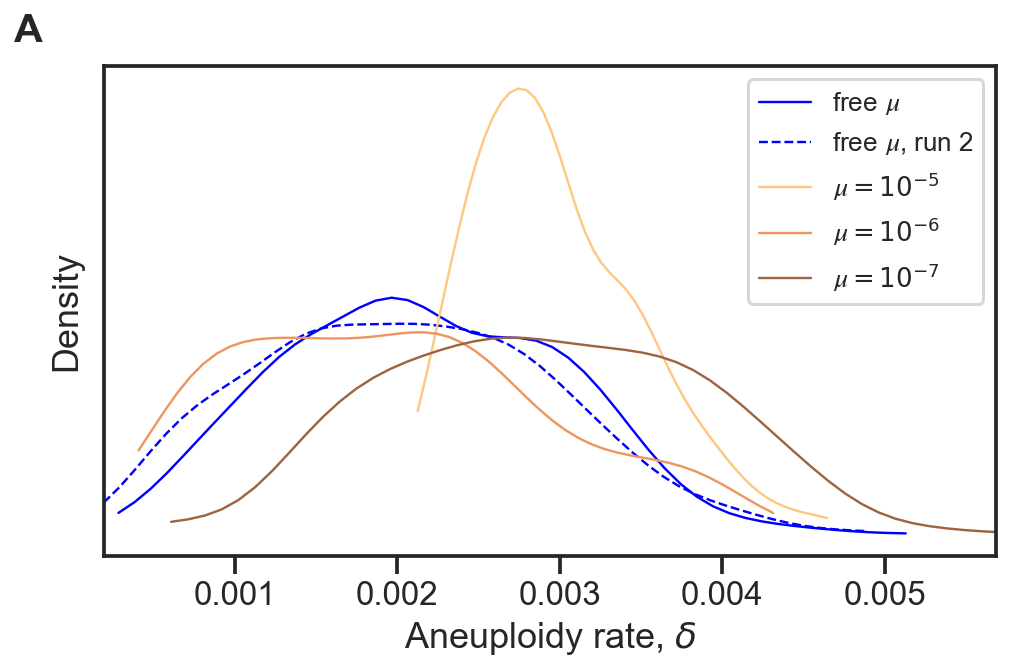

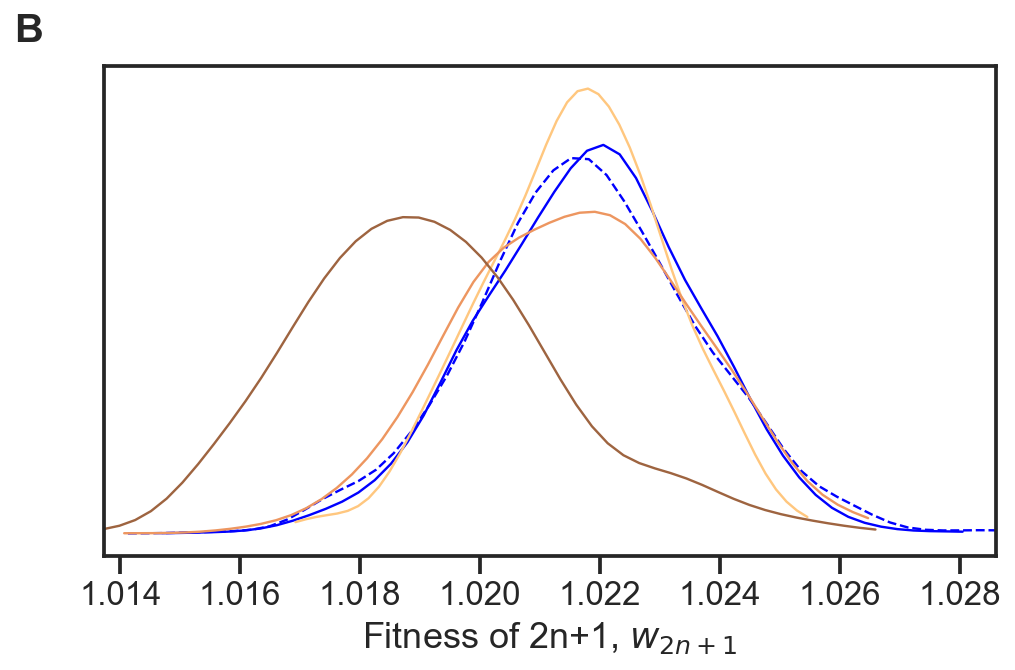

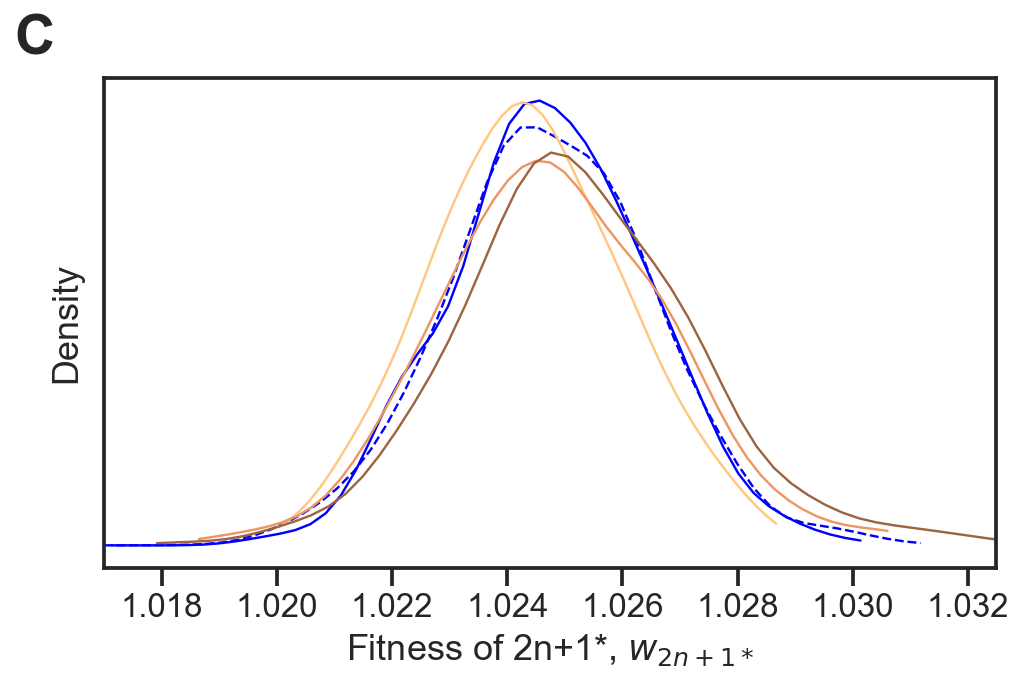

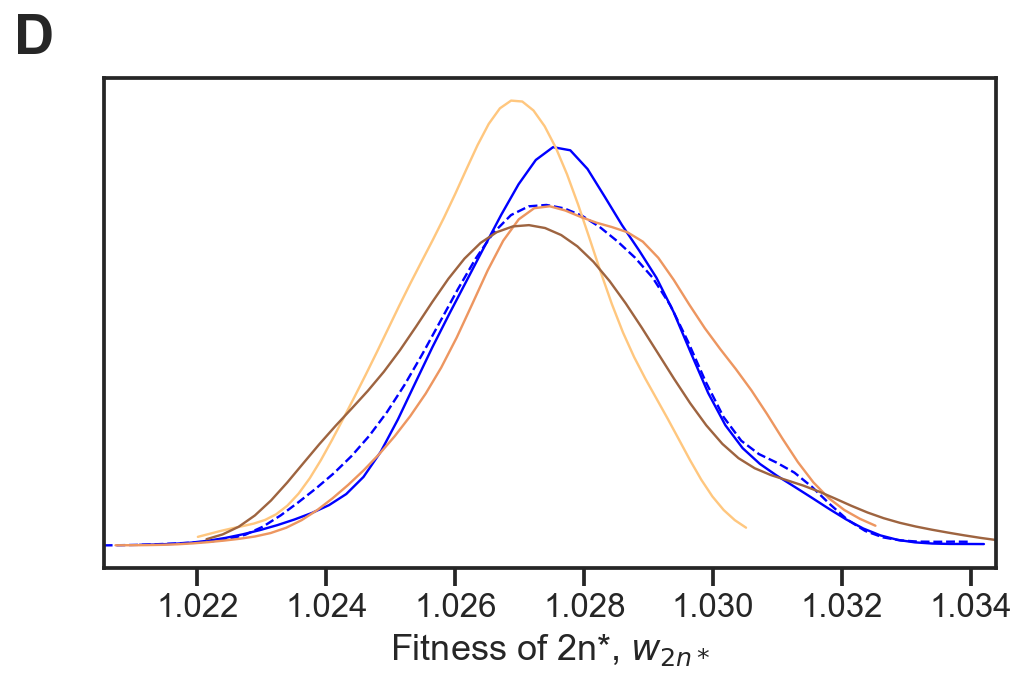

In [71]:
import seaborn as sns
sns.set(style="ticks",context='talk' ,rc={"lines.linewidth": 1.2, 'lines.markersize': 7})
from matplotlib import cm
import string

def compare(files, p, c, labels, ax):
    cm_subsection = np.linspace(0, 1.0, len(labels))
    cm_subsection = list(cm_subsection)
    cm_subsection.reverse()
    colors = [ cm.copper(x) for x in cm_subsection]
    colors[0] = 'blue'
    colors[1] = 'blue'
    colors[2:] = [ cm.copper(x) for x in cm_subsection]
    colors[2:].reverse()
    linestyles = ['solid']*len(labels)
    linestyles[1] = 'dashed'
    xmin = 1000
    xmax = -1000
    for f ,l, color,ln in zip(files,labels,colors,linestyles):
        history = pyabc.History("sqlite:///{0}/{1}/{1}.db".format(path,f))
        df, w = history.get_distribution(m=0, t=None)
        df.drop([x for x in ['p1_mr'] if x in df.columns], axis=1, inplace=True)
        xmin = min(xmin, min(df[p]))
        xmax = max(xmax, max(df[p]))
        pyabc.visualization.plot_kde_1d(
            df,
            w,
            x=p,
            xname=c,
            ax=ax,
            label=f"{l}",
            color=color,
            linestyle=ln,
        )
    ax.set_xlim(xmin, xmax)

        
history = pyabc.History("sqlite:///{0}/{1}/{1}.db".format(path,f_fixedm5))
samples, weights = history.get_distribution(m=0, t=None)
c = ['Aneuploidy rate, $\delta$', 'Fitness of 2n+1, $w_{2n+1}$', 
     'Fitness of 2n+1*, $w_{2n+1*}$', 'Fitness of 2n*, $w_{2n*}$']
p_to_c = {p:c for p,c in zip(list(samples.columns),c)} #param name of samples to column name that should be shown

i=-1

for p in samples.columns.values:
    i+=1
    fig, ax = plt.subplots(figsize=(8,4.5))
    compare(allf, p, p_to_c[p], labels, ax)
    ax.text(-0.1, 1.05, string.ascii_uppercase[i], transform=ax.transAxes, size=20 if i<2 else 28, weight='bold')
    ax.set_ylabel("Density" if i==0 or i==2 else "",labelpad=10)
    ax.axes.yaxis.set_ticks([])
    if i==0:
        ax.legend(bbox_to_anchor=(1, 1),loc='upper right',fontsize=13);
    plt.gcf().savefig(f'{output_path}/mu-{string.ascii_uppercase[i]}.pdf', bbox_inches='tight', dpi=100)

In [81]:
def roundd(v):
    return round(v,3)
        
def findd(n):
    for i in range(0,12):
        m = n*10**i
        if m>=1 and m<=10:
            return i
    raise ValueError(n)
           
# returns (MAP, low_hdi, high_hdi)
def calc_hdi(f, hdi_p=.50):
    history = pyabc.History("sqlite:///{0}/{1}/{1}.db".format(path, f))
    samples, weights = history.get_distribution(m=0, t=None)
    samples.drop([x for x in ['p1_mr'] if x in samples.columns], axis=1, inplace=True)
    columns = list(samples.columns)
    kde = scipy.stats.gaussian_kde(samples.T.values.tolist(), weights=weights)
    size = 50000
    samples = kde.resample(size).T
    samples = pd.DataFrame(data=samples)
    MAP = scipy.optimize.minimize(lambda x: -kde.logpdf(x) ,samples.median().values)['x']
    hdi_res = hdi(samples.values, hdi_prob=hdi_p)
    hi = hdi_res.T[1]
    lo = hdi_res.T[0]
    return (MAP, lo, hi)

def print_mode_and_hdi(f, display_cols=['\delta','w_{2n+1}','w_{2n+1^*}', 'w_{2n^*}'], hdi_p=.50):
    ans = calc_hdi(f,hdi_p)
    orders = [np.array(list(map(findd,ans))) for ans in ans]
    singles = [list(map(roundd,ans*(10**np.array(list(map(findd,ans)))))) for ans in ans]
    for a in list(zip(list(display_cols),*singles, *orders)):
        if a[-1]==0:
            print('${}={}\ [{}-{}]$,'.format(*a))
        else:
            print('${0}={1}\\cdot10^{{-{4}}}\ [{2}\\cdot10^{{-{5}}}-{3}\\cdot10^{{-{6}}}]$,'.format(*a))
    

import warnings
warnings.filterwarnings('ignore')

In [78]:
labels

['free $𝜇$', 'free $𝜇$, run 2', '$𝜇=10^{-5}$', '$𝜇=10^{-6}$', '$𝜇=10^{-7}$']

In [82]:
labels2 = ['\\textbf{free $\\boldsymbol{\\mu}$:}',
           '\\textbf{free $\\boldsymbol{\\mu}$, run 2:}',
           '\\textbf{$\\boldsymbol{\\mu=10^{-5}}$:}',
           '\\textbf{$\\boldsymbol{\\mu=10^{-6}}$:}', 
           '\\textbf{$\\boldsymbol{\\mu=10^{-7}}$:}']
for f, l in zip(allf, labels2):
    print(l)
    print_mode_and_hdi(f)
    print('')

\textbf{free $\boldsymbol{\mu}$:}
$\delta=2.749\cdot10^{-3}\ [1.476\cdot10^{-3}-2.822\cdot10^{-3}]$,
$w_{2n+1}=1.022\ [1.021-1.023]$,
$w_{2n+1^*}=1.025\ [1.023-1.026]$,
$w_{2n^*}=1.027\ [1.026-1.029]$,

\textbf{free $\boldsymbol{\mu}$, run 2:}
$\delta=1.938\cdot10^{-3}\ [1.338\cdot10^{-3}-2.748\cdot10^{-3}]$,
$w_{2n+1}=1.022\ [1.02-1.023]$,
$w_{2n+1^*}=1.025\ [1.023-1.026]$,
$w_{2n^*}=1.027\ [1.026-1.029]$,

\textbf{$\boldsymbol{\mu=10^{-5}}$:}
$\delta=3.089\cdot10^{-3}\ [2.412\cdot10^{-3}-3.169\cdot10^{-3}]$,
$w_{2n+1}=1.022\ [1.021-1.023]$,
$w_{2n+1^*}=1.024\ [1.023-1.026]$,
$w_{2n^*}=1.027\ [1.026-1.028]$,

\textbf{$\boldsymbol{\mu=10^{-6}}$:}
$\delta=1.413\cdot10^{-3}\ [1.04\cdot10^{-3}-2.529\cdot10^{-3}]$,
$w_{2n+1}=1.021\ [1.02-1.023]$,
$w_{2n+1^*}=1.024\ [1.023-1.026]$,
$w_{2n^*}=1.028\ [1.026-1.029]$,

\textbf{$\boldsymbol{\mu=10^{-7}}$:}
$\delta=3.4\cdot10^{-3}\ [2.043\cdot10^{-3}-3.578\cdot10^{-3}]$,
$w_{2n+1}=1.019\ [1.017-1.02]$,
$w_{2n+1^*}=1.026\ [1.024-1.027]$,
$w_{2n^*}

INFO:matplotlib.mathtext:Substituting symbol 𝜇 from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol 𝜇 from STIXGeneral


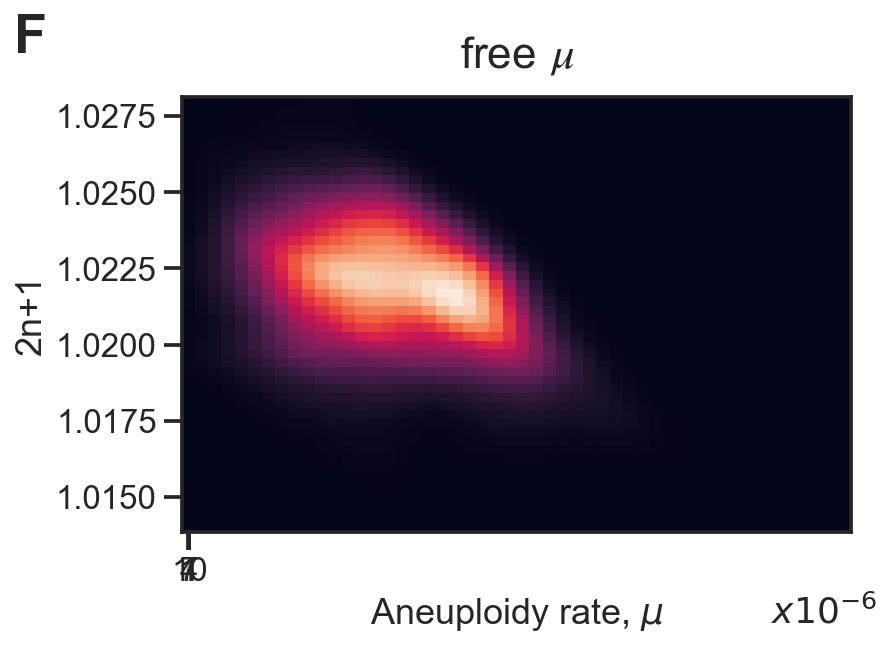

INFO:matplotlib.mathtext:Substituting symbol 𝜇 from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol 𝜇 from STIXGeneral


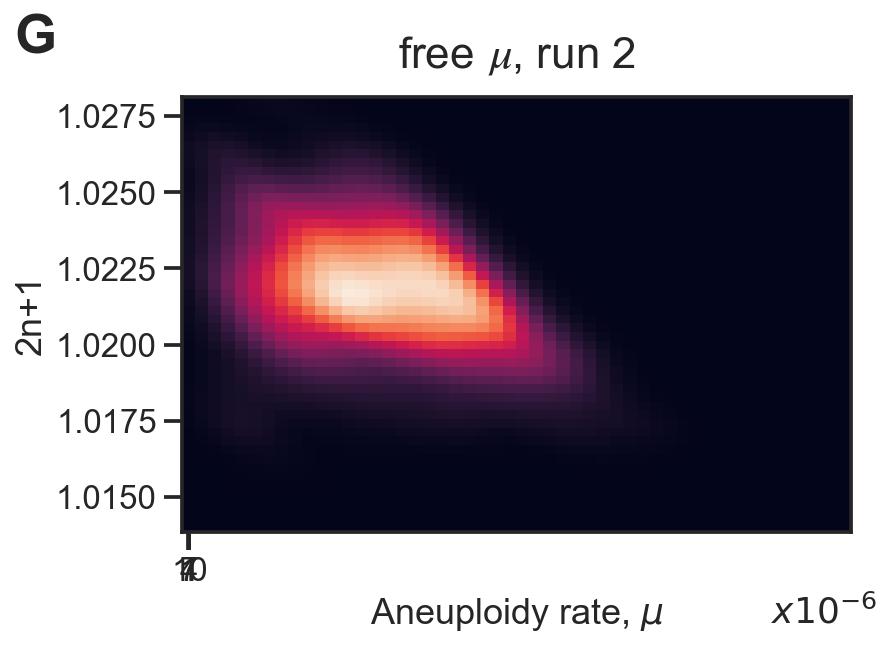

INFO:matplotlib.mathtext:Substituting symbol 𝜇 from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol 𝜇 from STIXGeneral


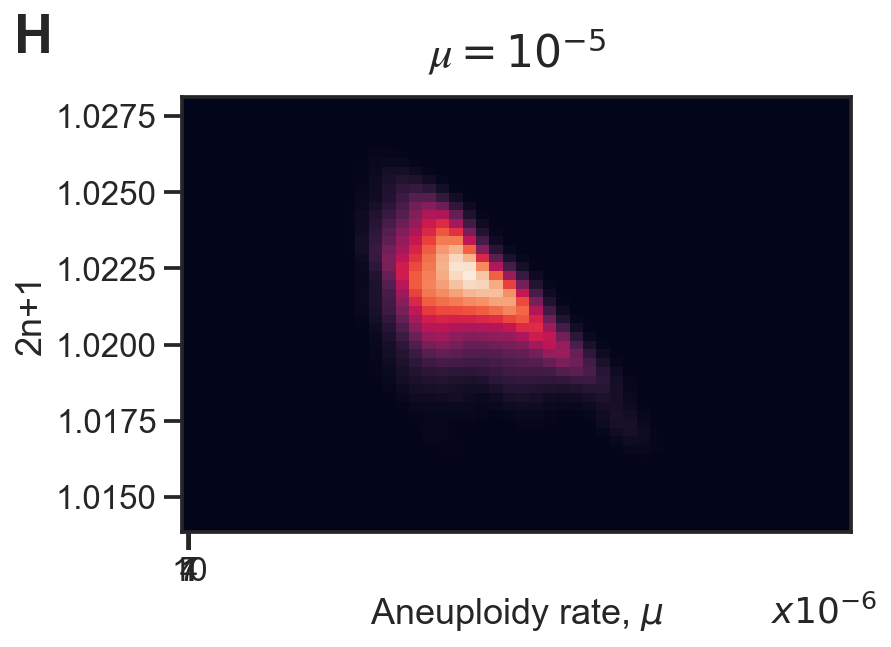

INFO:matplotlib.mathtext:Substituting symbol 𝜇 from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol 𝜇 from STIXGeneral


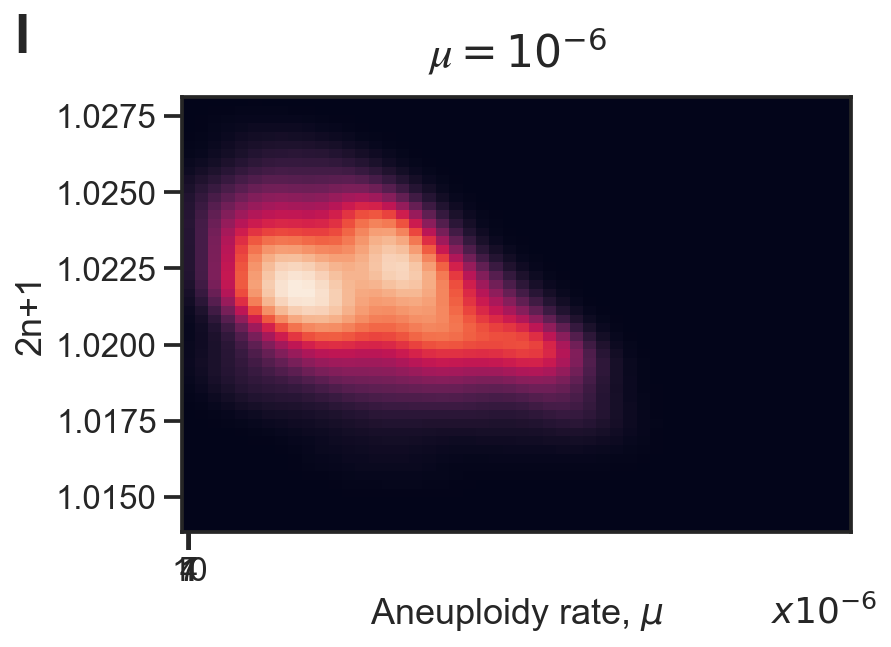

INFO:matplotlib.mathtext:Substituting symbol 𝜇 from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol 𝜇 from STIXGeneral


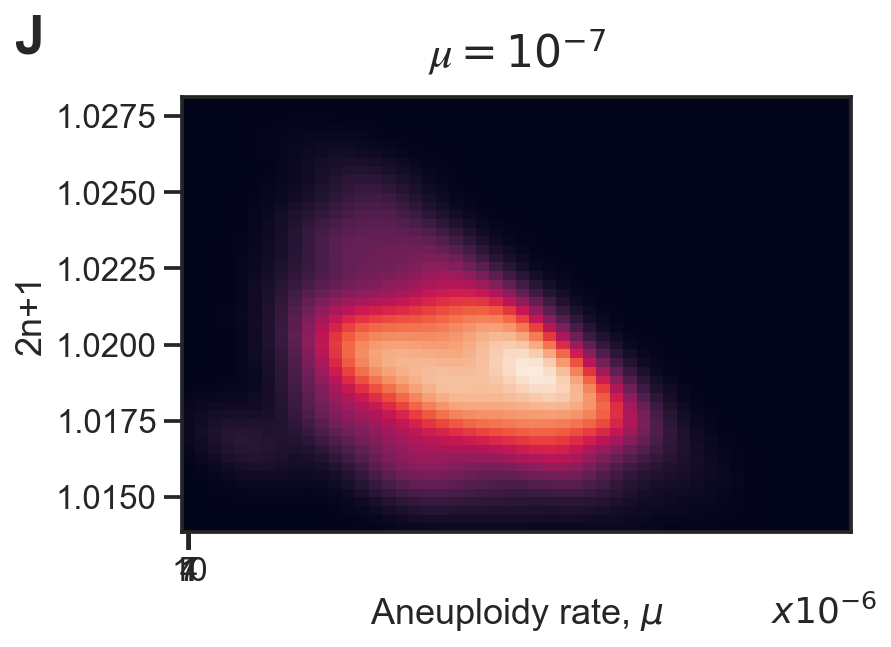

In [56]:
import seaborn as sns
# sns.set(style="ticks",context='talk' ,rc={"lines.linewidth": 1.2, 'lines.markersize': 7})
# sns.color_palette("Set2")
sns.set_context('talk')
plt.rcParams['font.sans-serif'] = ['Arial']
import string
# print(sns.axes_style())
# return

lims_mr = (10.0**-6,0.007)
lims_ar = (10.0**-6,10.0**-2)
lims_ar = (1.014,1.028)


i=4
for f, l in zip(allf, labels):
    i+=1
    fig, ax = plt.subplots()

    history = pyabc.History("sqlite:///{0}/{1}/{1}.db".format(path,f))

    s,w = history.get_distribution(m=0, t=None)
    
    plot_kde_2d(s,w, 'p2_tr', 'p3_w1' ,xmin=lims_mr[0], xmax=lims_mr[1], 
                ymin=lims_ar[0], ymax=lims_ar[1], colorbar=False, ax=ax)
    plt.xlabel("Aneuploidy rate, $\mu$");
    plt.ylabel("2n+1");
    plt.title(l, fontsize=22, y=1.04)
    ax.text(-0.25, 1.1, string.ascii_uppercase[i], transform=ax.transAxes, size=27, weight='bold')
    ax.ticklabel_format(style='plain')
    ax.text(0.88, -0.21, '$x10^{-6}$', transform=ax.transAxes)
    ax.set_xticks([1e-6, 4e-6, 7e-6, 10e-6])
    ax.set_xticklabels([int(a) for a in ax.get_xticks()*1e6]);
#     plt.gcf().savefig(f'{output_path}/tau-joint-{string.ascii_uppercase[i]}.pdf', bbox_inches='tight', dpi=100)
